<a href="https://colab.research.google.com/github/MohamedElsayed002/DeepLearning_IBM/blob/master/LeNetipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [12]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

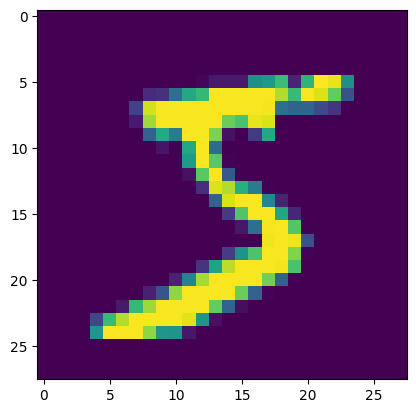

In [13]:
plt.imshow(x_train[0])

In [14]:
rows , cols = 28 , 28

# Reshape the data into a 4D Array

x_train = x_train.reshape(x_train.shape[0],rows,cols,1)
x_test = x_test.reshape(x_test.shape[0],rows,cols,1)

input_shape = (rows,cols,1)

# set types as float32 and normalize the values to [0,1]

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

# Transform labels to one hot encoding
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

# Define LeNet-5 Model

Create a new instance of a model object using Sequential model API. then add layers to the neural networks as per the LeNet-5 architecture discussed eariler. Finally, compile the model with 'categorical_crossentropy' loss function and 'SGD' cost optimization algorithm. When compiling the model add metrics=['accuracy'] as one of the parameters to calculate the accuracy of the model.

Its important to highlight that each image in the MNIST data set has a size of 28 X 28 pixels so we will use the same dimensions for LeNet-5 input instead of 32x32 pixels

In [22]:
def build_lenet(input_shape):

  model = tf.keras.Sequential()

  # C1 Convolution Layer
  model.add(tf.keras.layers.Conv2D(filters=6, strides=(1,1), kernel_size=(5,5), activation='relu', input_shape=input_shape))
  # S2 Subsampling Layer
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2))) # Correct the typo here: 'stides' -> 'strides'

  # C3 Convolution Layer
  model.add(tf.keras.layers.Conv2D(filters=6, strides=(1,1), kernel_size=(5,5), activation='relu'))

  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2))) # And here

  # C5 Fully Connected Layer
  model.add(tf.keras.layers.Dense(units=120,activation='relu'))

  # Flatten the output so that we can connect it with the fully connected layers
  model.add(tf.keras.layers.Flatten())

  # FC6 Funlly Connected Layers
  model.add(tf.keras.layers.Dense(units=84,activation='relu'))

  # FC7 Output Layer
  model.add(tf.keras.layers.Dense(units=10,activation='softmax'))


  # Compile the model
  # Use the legacy optimizer or remove the decay argument
  model.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.legacy.SGD(lr=0.1, momentum=0.0, decay=0.0),
                metrics=['accuracy'])


  return model

In [23]:
lenet = build_lenet(input_shape)

# We will be allowing 10 itterations to happen

epochs = 10
history = lenet.fit(x_train, y_train, epochs=epochs,batch_size=128, verbose=1)


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
469/469 [==============================] - 23s 46ms/step - loss: 0.4064 - accuracy: 0.8738
Epoch 2/10
469/469 [==============================] - 20s 43ms/step - loss: 0.1167 - accuracy: 0.9646
Epoch 3/10
469/469 [==============================] - 22s 47ms/step - loss: 0.0818 - accuracy: 0.9743
Epoch 4/10
469/469 [==============================] - 21s 44ms/step - loss: 0.0666 - accuracy: 0.9791
Epoch 5/10
469/469 [==============================] - 21s 45ms/step - loss: 0.0545 - accuracy: 0.9827
Epoch 6/10
469/469 [==============================] - 21s 46ms/step - loss: 0.0474 - accuracy: 0.9853
Epoch 7/10
469/469 [==============================] - 20s 43ms/step - loss: 0.0407 - accuracy: 0.9870
Epoch 8/10
469/469 [==============================] - 21s 46ms/step - loss: 0.0352 - accuracy: 0.9893
Epoch 9/10
469/469 [==============================] - 20s 43ms/step - loss: 0.0315 - accuracy: 0.9898
Epoch 10/10
469/469 [==============================] - 22s 46ms/step - loss: 0.028

In [24]:
lenet.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 6)           906       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 4, 4, 6)           0         
 g2D)                                                            
                                                                 
 dense_3 (Dense)             (None, 4, 4, 120)         840       
                                                                 
 flatten_1 (Flatten)         (None, 1920)             

In [25]:
# Check Accuracy of the Model

loss , acc = lenet.evaluate(x_test,y_test)
print('Accuracy : ', acc)

313/313 [==============================] - 4s 10ms/step - loss: 0.0549 - accuracy: 0.9835
Accuracy :  0.9835000038146973


In [26]:
x_train = x_train.reshape(x_train.shape[0], 28,28)
print('Training Data', x_train.shape, y_train.shape)
x_test = x_test.reshape(x_test.shape[0], 28,28)
print('Test Data', x_test.shape, y_test.shape)


Training Data (60000, 28, 28) (60000, 10)
Test Data (10000, 28, 28) (10000, 10)


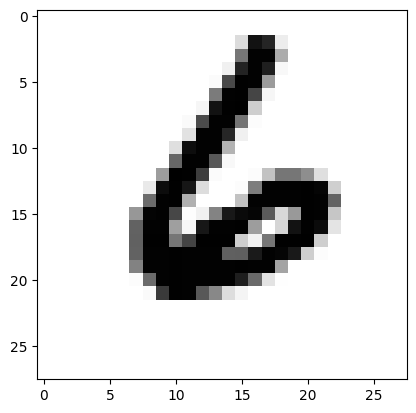

In [27]:
image_index = 8888
plt.imshow(x_test[image_index].reshape(28,28), cmap='Greys')

In [28]:
pred = lenet.predict(x_test[image_index].reshape(1, rows, cols, 1 ))
print(pred.argmax())


1/1 [==============================] - 0s 458ms/step
6
